# Image reshaping for Tensorflow

References: 
- https://www.tensorflow.org/api_docs/python/tf/image/resize_images 
- https://learningtensorflow.com/lesson3/
- https://stackoverflow.com/questions/39952592/tf-image-decode-jpeg-raise-invalidargumenterror

## 1. Plotting on a graph via Tensorflow

Type:  <class 'numpy.ndarray'>
Shape:  <class 'tuple'>
X:  <tf.Variable 'x:0' shape=(268, 189, 3) dtype=float32_ref>


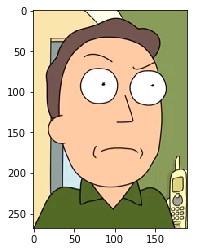

In [1]:
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# First, load the image again
image = mpimg.imread("jerry.png")

print("Type: ", type(image))
print("Shape: ", type(image.shape))

# Create a TensorFlow Variable
x = tf.Variable(image, name='x')
print("X: ", x)

model = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(model)
    result = session.run(x)
    
plt.imshow(result)
plt.show()

## 2. Reshaping the image 

References: 
- https://www.tensorflow.org/api_docs/python/tf/image/resize_images 

The following code demonstrates how to reduce the resolution of the image by resizing the raw data.

The **set_shape()** method is used as the file_contents does not allow for the decoded png to be read when creating as a tf.Variable. 

Other parameters options for the **resize_image()** method include:
- ResizeMethod.BILINEAR
- ResizeMethod.NEAREST_NEIGHBOR (Best human results)
- ResizeMethod.BICUBIC
- ResizeMethod.AREA

Initial shape:  (268, 189, 3)
Rescale percentage:  40.0 %
Rescaled image to contain 107 rows and 75 columns
Resized Shape:  (107, 75, 3)


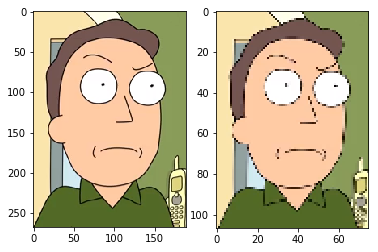

In [24]:
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# First, load the image and graph the shape of the image.
image = mpimg.imread("jerry.png")
original_shape = image.shape

# Read the image using tf's file reading method
file_contents = tf.read_file("jerry.png")
decoded_image = tf.image.decode_png(file_contents, dtype=tf.uint8, channels=3)   

# Set the shape of the image as this is unknown.
decoded_image.set_shape(original_shape)
print("Initial shape: ", decoded_image.get_shape())

# Set a rescale value
rescale_percentage = 0.4
rescaled_row = int(original_shape[0] * rescale_percentage)
rescaled_col = int(original_shape[1] * rescale_percentage)

print("Rescale percentage: ", rescale_percentage * 100, "%")
print("Rescaled image to contain %s rows and %s columns" % (rescaled_row, rescaled_col))

resize_shape = tf.stack([rescaled_row,rescaled_col])
resized_image = tf.image.resize_images(
    decoded_image, 
    resize_shape,
    method=tf.image.ResizeMethod.NEAREST_NEIGHBOR
)
print("Resized Shape: ", resized_image.get_shape())

# # Create a TensorFlow Variable
x = tf.Variable(decoded_image, name='x')
y = tf.Variable(resized_image, name='y')

model = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(model)
    original = session.run(x)
    resized = session.run(y)
        
fig, axarr = plt.subplots(1,2)
axarr[0].imshow(original)
axarr[1].imshow(resized)
plt.show()

### 3. Reshape with crop and pad 

References: https://www.tensorflow.org/api_docs/python/tf/image/resize_image_with_crop_or_pad 

Use the **resize_image_with_crop_or_pad()** method.

Initial shape:  (268, 189, 3)


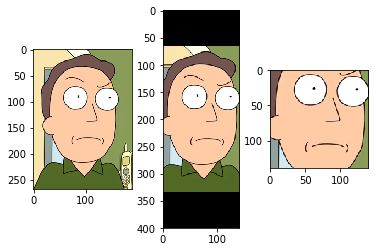

In [27]:
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# First, load the image and graph the shape of the image.
image = mpimg.imread("jerry.png")
original_shape = image.shape

# Read the image using tf's file reading method
file_contents = tf.read_file("jerry.png")
decoded_image = tf.image.decode_png(file_contents, dtype=tf.uint8, channels=3)   

# Set the shape of the image as this is unknown.
decoded_image.set_shape(original_shape)
print("Initial shape: ", decoded_image.get_shape())

resize_shape = tf.stack([rescaled_row,rescaled_col])
padded_image = tf.image.resize_image_with_crop_or_pad(
    decoded_image, 400, 140)

cropped_image = tf.image.resize_image_with_crop_or_pad(
    decoded_image, 140,140)

# # Create a TensorFlow Variable
x = tf.Variable(decoded_image, name='x')
y = tf.Variable(padded_image, name='y')
z = tf.Variable(cropped_image, name='z')

model = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(model)
    original = session.run(x)
    padded = session.run(y)
    cropped = session.run(z)
    
fig, axarr = plt.subplots(1,3)
axarr[0].imshow(original)
axarr[1].imshow(padded)
axarr[2].imshow(cropped)

plt.show()